In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fast')
# just open the file
df1 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P1ori3/20160222/20160222_flat.csv')
df2 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P1ori3/20160320/20160320_flat.csv')
df = pd.concat([df1, df2])
images_dir = '/content/drive/MyDrive/ColabNotebooks/Project/Plots/P1ori'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


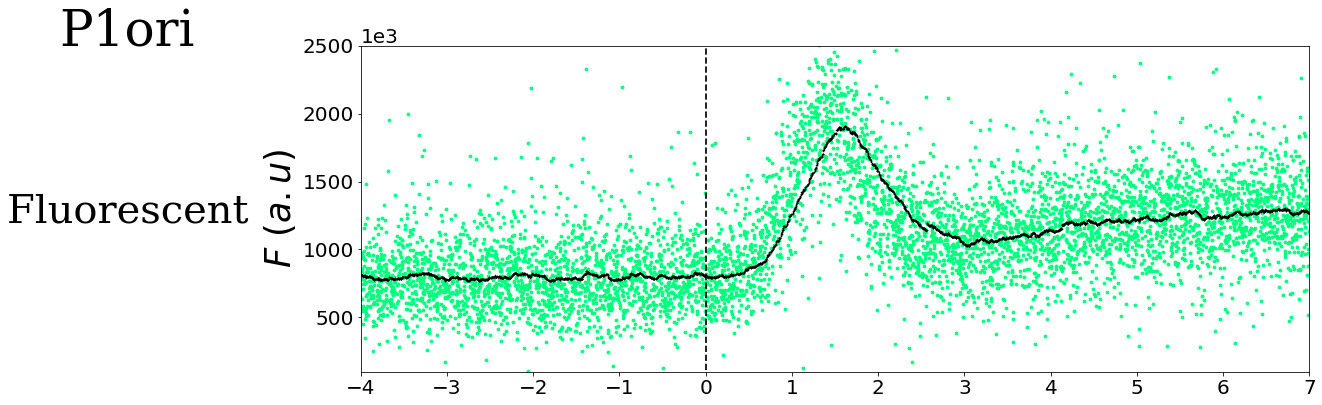

In [2]:
flourescense = df[['fov', 't1Trans']]
flourescense['Absolute fluorescence'] = df.apply(lambda x: abs(x['Itot0'] - x['Itot1']), axis=1)
flourescenseT = flourescense.pivot_table('Absolute fluorescence', index='t1Trans', columns='fov', aggfunc='mean', margins=True)
flourescenseT = flourescenseT.fillna(0)

flourescenseT = flourescenseT['All']
flourescenseT = pd.DataFrame(flourescenseT)
flourescenseT= flourescenseT.reset_index(['t1Trans'])
flourescenseT= flourescenseT[:-1]

#Rolling average
flourescenseT['Rolling average'] = flourescenseT['All'].ewm(span=200).mean()

plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=5000000, ymax=6,color='k',  ls='--',lw = 1.7)
plt.scatter(flourescenseT['t1Trans']/60, flourescenseT['All'], color='springgreen', s= 8)
plt.plot(flourescenseT['t1Trans']/60, flourescenseT['Rolling average'],'.', color='k', markersize=1.1)
#plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$F~(a.u)$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.ticklabel_format(axis="y", style="sci", scilimits=(3,3))
plt.ylim(100000,2500000)
plt.xlim(-4,7)
plt.text(-8.1, 1200000, r'Fluorescent ',family="serif", fontsize=40)
plt.text(-7.5, 2500000, r'P1ori',family="serif", fontsize=50)
#plt.title('P5ori', fontsize = 30, family = 'sarif')
plt.savefig(f"{images_dir}/FlourescenseP1ori.png", bbox_inches="tight", dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


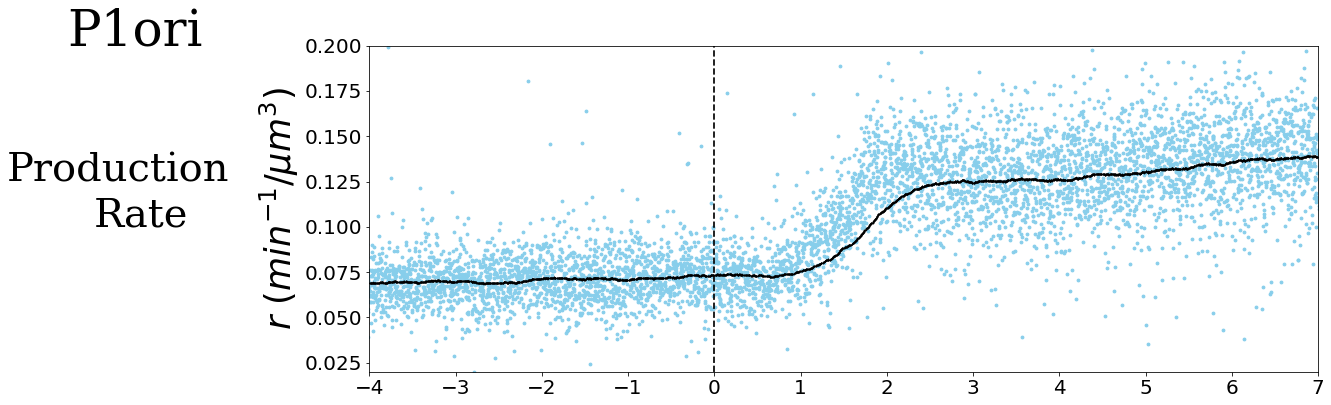

In [3]:
Rate = df[['fov', 't1Trans']]
Rate['Absolute fluorescence'] = df.apply(lambda x: abs(x['Itot0'] - x['Itot1'])/(abs(x['t0Trans'] - x['t1Trans'])*x['V1']), axis=1)
RateT = Rate.pivot_table('Absolute fluorescence', index='t1Trans', columns='fov', aggfunc='mean', margins=True)
RateT = RateT.fillna(0)
RateT = RateT['All']
RateT = pd.DataFrame(RateT)
RateT= RateT.reset_index(['t1Trans'])
RateT= RateT[:-1]

#Rolling average
RateT['Rolling average'] = RateT['All'].ewm(span=500).mean()

plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=0.2,color='k',  ls='--',lw = 1.7)
plt.scatter(RateT['t1Trans']/60, RateT['All']/100000, color='skyblue', s= 8)
plt.plot(RateT['t1Trans']/60, RateT['Rolling average']/100000, '.', color='k', markersize=1.1)
#plt.xlabel(r'Time (h)', family="serif",fontsize = 20)
plt.ylabel(r'$r~(min^{-1}/\mu m^{3})$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.ylim(0.02,0.2)
plt.xlim(-4,7)
plt.text(-7.5, 0.2, r'P1ori',family="serif", fontsize=50)
plt.text(-8.2, 0.125, r'Production',family="serif", fontsize=40)
plt.text(-7.2, 0.10, r'Rate',family="serif", fontsize=40)
plt.savefig(f"{images_dir}/RateP1ori.png", bbox_inches = "tight", dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


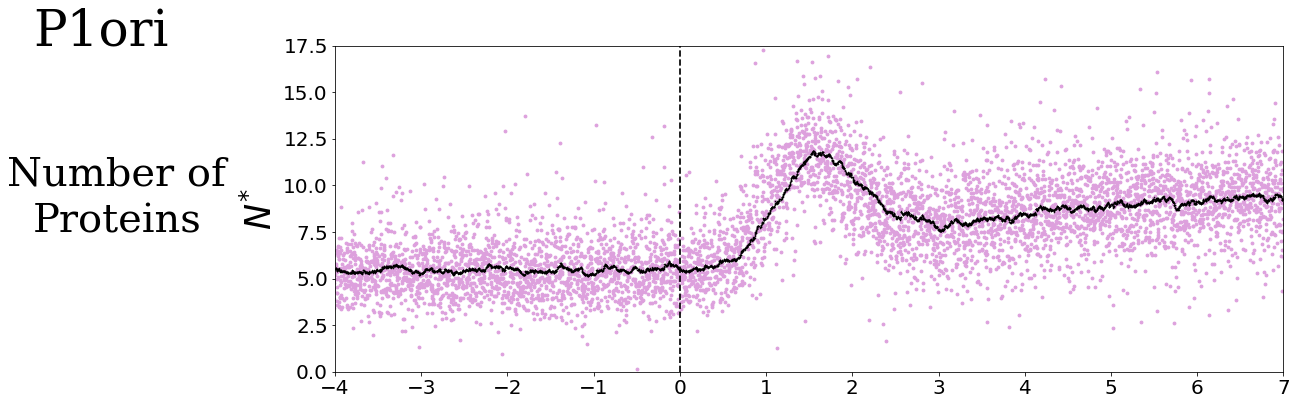

In [4]:
Proteins = df[['fov', 't1Trans']]
#Proteins['Absolute fluorescence'] = df.apply(lambda x: (abs(x['Itot0'] - x['Itot1'])/(abs(x['t0Trans'] - x['t1Trans'])*x['V1']))*abs(x['V1'] - x['V0'])/x['expfitBL2'], axis=1)
Proteins['Absolute fluorescence'] = df.apply(lambda x: (abs(x['Itot0'] - x['Itot1'])/(abs(x['t0Trans'] - x['t1Trans'])*x['V1']*x['expfitBV2']))*abs(x['V1'] - x['V0']), axis=1)

ProteinsT = Proteins.pivot_table('Absolute fluorescence', index='t1Trans', columns='fov', aggfunc='mean', margins=True)
ProteinsT = ProteinsT.fillna(0)

ProteinsT = ProteinsT['All']
ProteinsT = pd.DataFrame(ProteinsT)
ProteinsT= ProteinsT.reset_index(['t1Trans'])
ProteinsT= ProteinsT[:-1]

#Rolling average
ProteinsT['Rolling average'] = ProteinsT['All'].ewm(span=110).mean()

plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=20,color='k',  ls='--',lw = 1.7)
plt.scatter(ProteinsT['t1Trans']/60, ProteinsT['All']/100000, color='plum', s= 8)
plt.plot(ProteinsT['t1Trans']/60, ProteinsT['Rolling average']/100000, '.', color='k', markersize=1.1)
#plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$N^{*}$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.ylim(0,17.5)
plt.xlim(-4,7)
plt.text(-7.5, 17.5, r'P1ori',family="serif", fontsize=50)
plt.text(-7.8, 10, r'Number of',family="serif", fontsize=40)
plt.text(-7.5, 7.5, r'Proteins',family="serif", fontsize=40)
plt.savefig(f"{images_dir}/NumberOfProteinsP1ori.png", bbox_inches = "tight", dpi=100)